<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/HandlingImageData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap. 8 Handling Images**

In [6]:
# Load Libreay
import cv2, matplotlib.pyplot as plt

In [3]:
cv2.__version__

'4.1.2'

In [17]:
image = cv2.imread('sim_data/images/plane.jpg', cv2.IMREAD_GRAYSCALE)

(-0.5, 3599.5, 2269.5, -0.5)

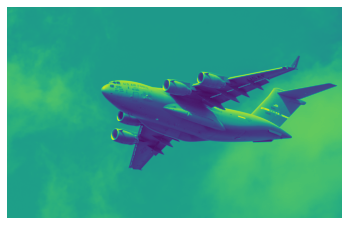

In [23]:
# Show image first
plt.imshow(image); plt.axis('off')

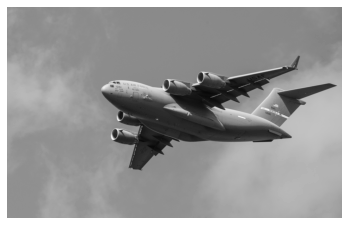

In [22]:
# Show image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [24]:
# Show data type
type(image)

numpy.ndarray

In [25]:
# Show dimensions
image.shape

(2270, 3600)

In [26]:
# Show data
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [27]:
# SHow first pixel
image[0, 0]

140

**Read image with color**

In [32]:
# Load image in color
image_bgr = cv2.imread('sim_data/images/plane.jpg', cv2.IMREAD_COLOR)

In [33]:
# Show first pixel in color
image_bgr[0, 0]

array([195, 144, 111], dtype=uint8)

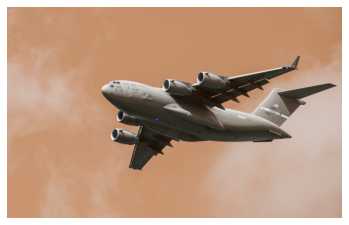

In [34]:
# Show image color
plt.imshow(image_bgr); plt.axis('off'); plt.show()

**Convert image**

In [35]:
# Convert image
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

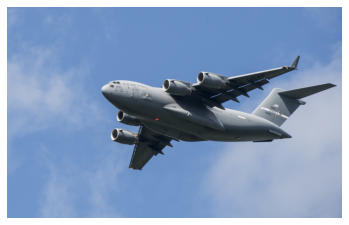

In [36]:
# Show image
plt.imshow(image_rgb); plt.axis('off'); plt.show()

## 8.2 Saving Images

**Problem**

You want to save an image for preprocessing.

**Solution**

Use OpenCV’s imwrite :

In [37]:
#Load image as grayscale
image = cv2.imread('sim_data/images/plane.jpg', cv2.IMREAD_GRAYSCALE)

In [38]:
# Save image
cv2.imwrite('sim_data/images/plane_new.jpg', image)

True

## Resizing Images

**Problem**

You want to resize an image for further preprocessing.

**Solution**

Use resize to change the size of an image:

In [42]:
# Load image as grayscale
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

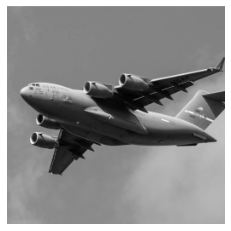

In [43]:
# Show the image loaded
plt.imshow(image, cmap='gray'); plt.axis('off'); plt.show()

**Resizing image**

In [44]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

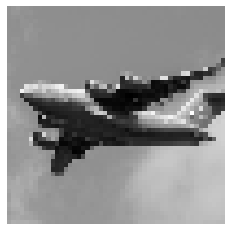

In [46]:
# View the image resized
plt.imshow(image_50x50, cmap='gray'); plt.axis('off'); plt.show()

## 8.4 Cropping Images

**Problem**

You want to remove the outer portion of the image to change its dimensions.

**Solution**

The image is encoded as a two-dimensional NumPy array, so we can crop the image
easily by slicing the array:

In [47]:
# Load image in grayscaled
image = cv2.imread('sim_data/images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

In [48]:
# Show the image dimension
image.shape

(256, 256)

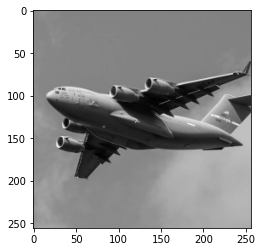

In [51]:
# Show image without cropping
plt.imshow(image, cmap='gray')

**Cropping Image**

In [49]:
# Select the first half of the columns and all rows
image_cropped = image[:, :128]

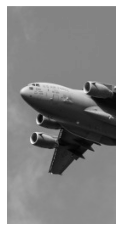

In [50]:
# Show the image part cropped
plt.imshow(image_cropped, cmap='gray'); plt.axis("off"); plt.show()

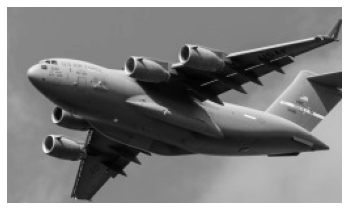

In [53]:
# Cropping image
plt.imshow(image[50:200, :], cmap='gray'); plt.axis('off'); plt.show()